In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

### Import csv files

In [42]:
movie_data = pd.read_csv("./Mojo_budget_update.csv")
movie_data = movie_data.drop(columns=['html', 'movie_id'])
movie_data

,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,producer,...,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,May 25,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,Neil Canton,...,Mary Steenburgen,Thomas F. Wilson,40000000.0,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,December 22,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,Brian De Palma,...,Melanie Griffith,Kim Cattrall,47000000.0,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,November 9,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,Kevin Costner,...,Graham Greene,Rodney A. Grant,22000000.0,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,June 15,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,Warren Beatty,...,Al Pacino,Charlie Korsmo,47000000.0,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,July 6,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,Charles Gordon,...,Bonnie Bedelia,Reginald VelJohnson,70000000.0,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Midsommar,2019,A couple travels to Sweden to visit a rural ho...,R,July 3,2 hr 28 min,A24,Ari Aster,Ari Aster,Patrik Andersson,...,Vilhelm Blomgren,William Jackson Harper,9000000.0,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,Knives Out,2019,A detective investigates the death of a patria...,PG-13,November 21,2 hr 11 min,Lionsgate,Rian Johnson,Rian Johnson,Ram Bergman,...,Ana de Armas,Jamie Lee Curtis,40000000.0,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,Unplanned,2019,All Abby Johnson ever wanted to do was help wo...,R,March 29,1 hr 49 min,Pure Flix Entertainment,Chuck Konzelman,Abby Johnson,Chris Jones,...,Robia Scott,Jared Lotz,6000000.0,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,Playing with Fire,2019,A crew of rugged firefighters meet their match...,PG,November 7,1 hr 36 min,Paramount Pictures,Andy Fickman,Dan Ewen,Todd Garner,...,John Leguizamo,Tyler Mane,29900000.0,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


### Q1: How many movies has each distributor produced?

In [50]:
distributor_count = movie_data.groupby('distributor').count().reset_index()
distributor_count['title'] = pd.to_numeric(distributor_count['title'])
distributor_count = distributor_count.sort_values(by = ['title'], ascending = False)
distributor_count['distributor'][:20]

188                           Warner Bros.
182                     Universal Pictures
178                  Twentieth Century Fox
161                Sony Pictures Releasing
187    Walt Disney Studios Motion Pictures
126                     Paramount Pictures
86                               Lionsgate
107                        New Line Cinema
97                                 Miramax
151                            Screen Gems
94                 Metro-Goldwyn-Mayer MGM
61                Fox Searchlight Pictures
44                 DreamWorks Distribution
160                 Sony Pictures Classics
58                          Focus Features
174                       TriStar Pictures
142                       Relativity Media
43                              DreamWorks
42                         Dimension Films
172                  The Weinstein Company
Name: distributor, dtype: object

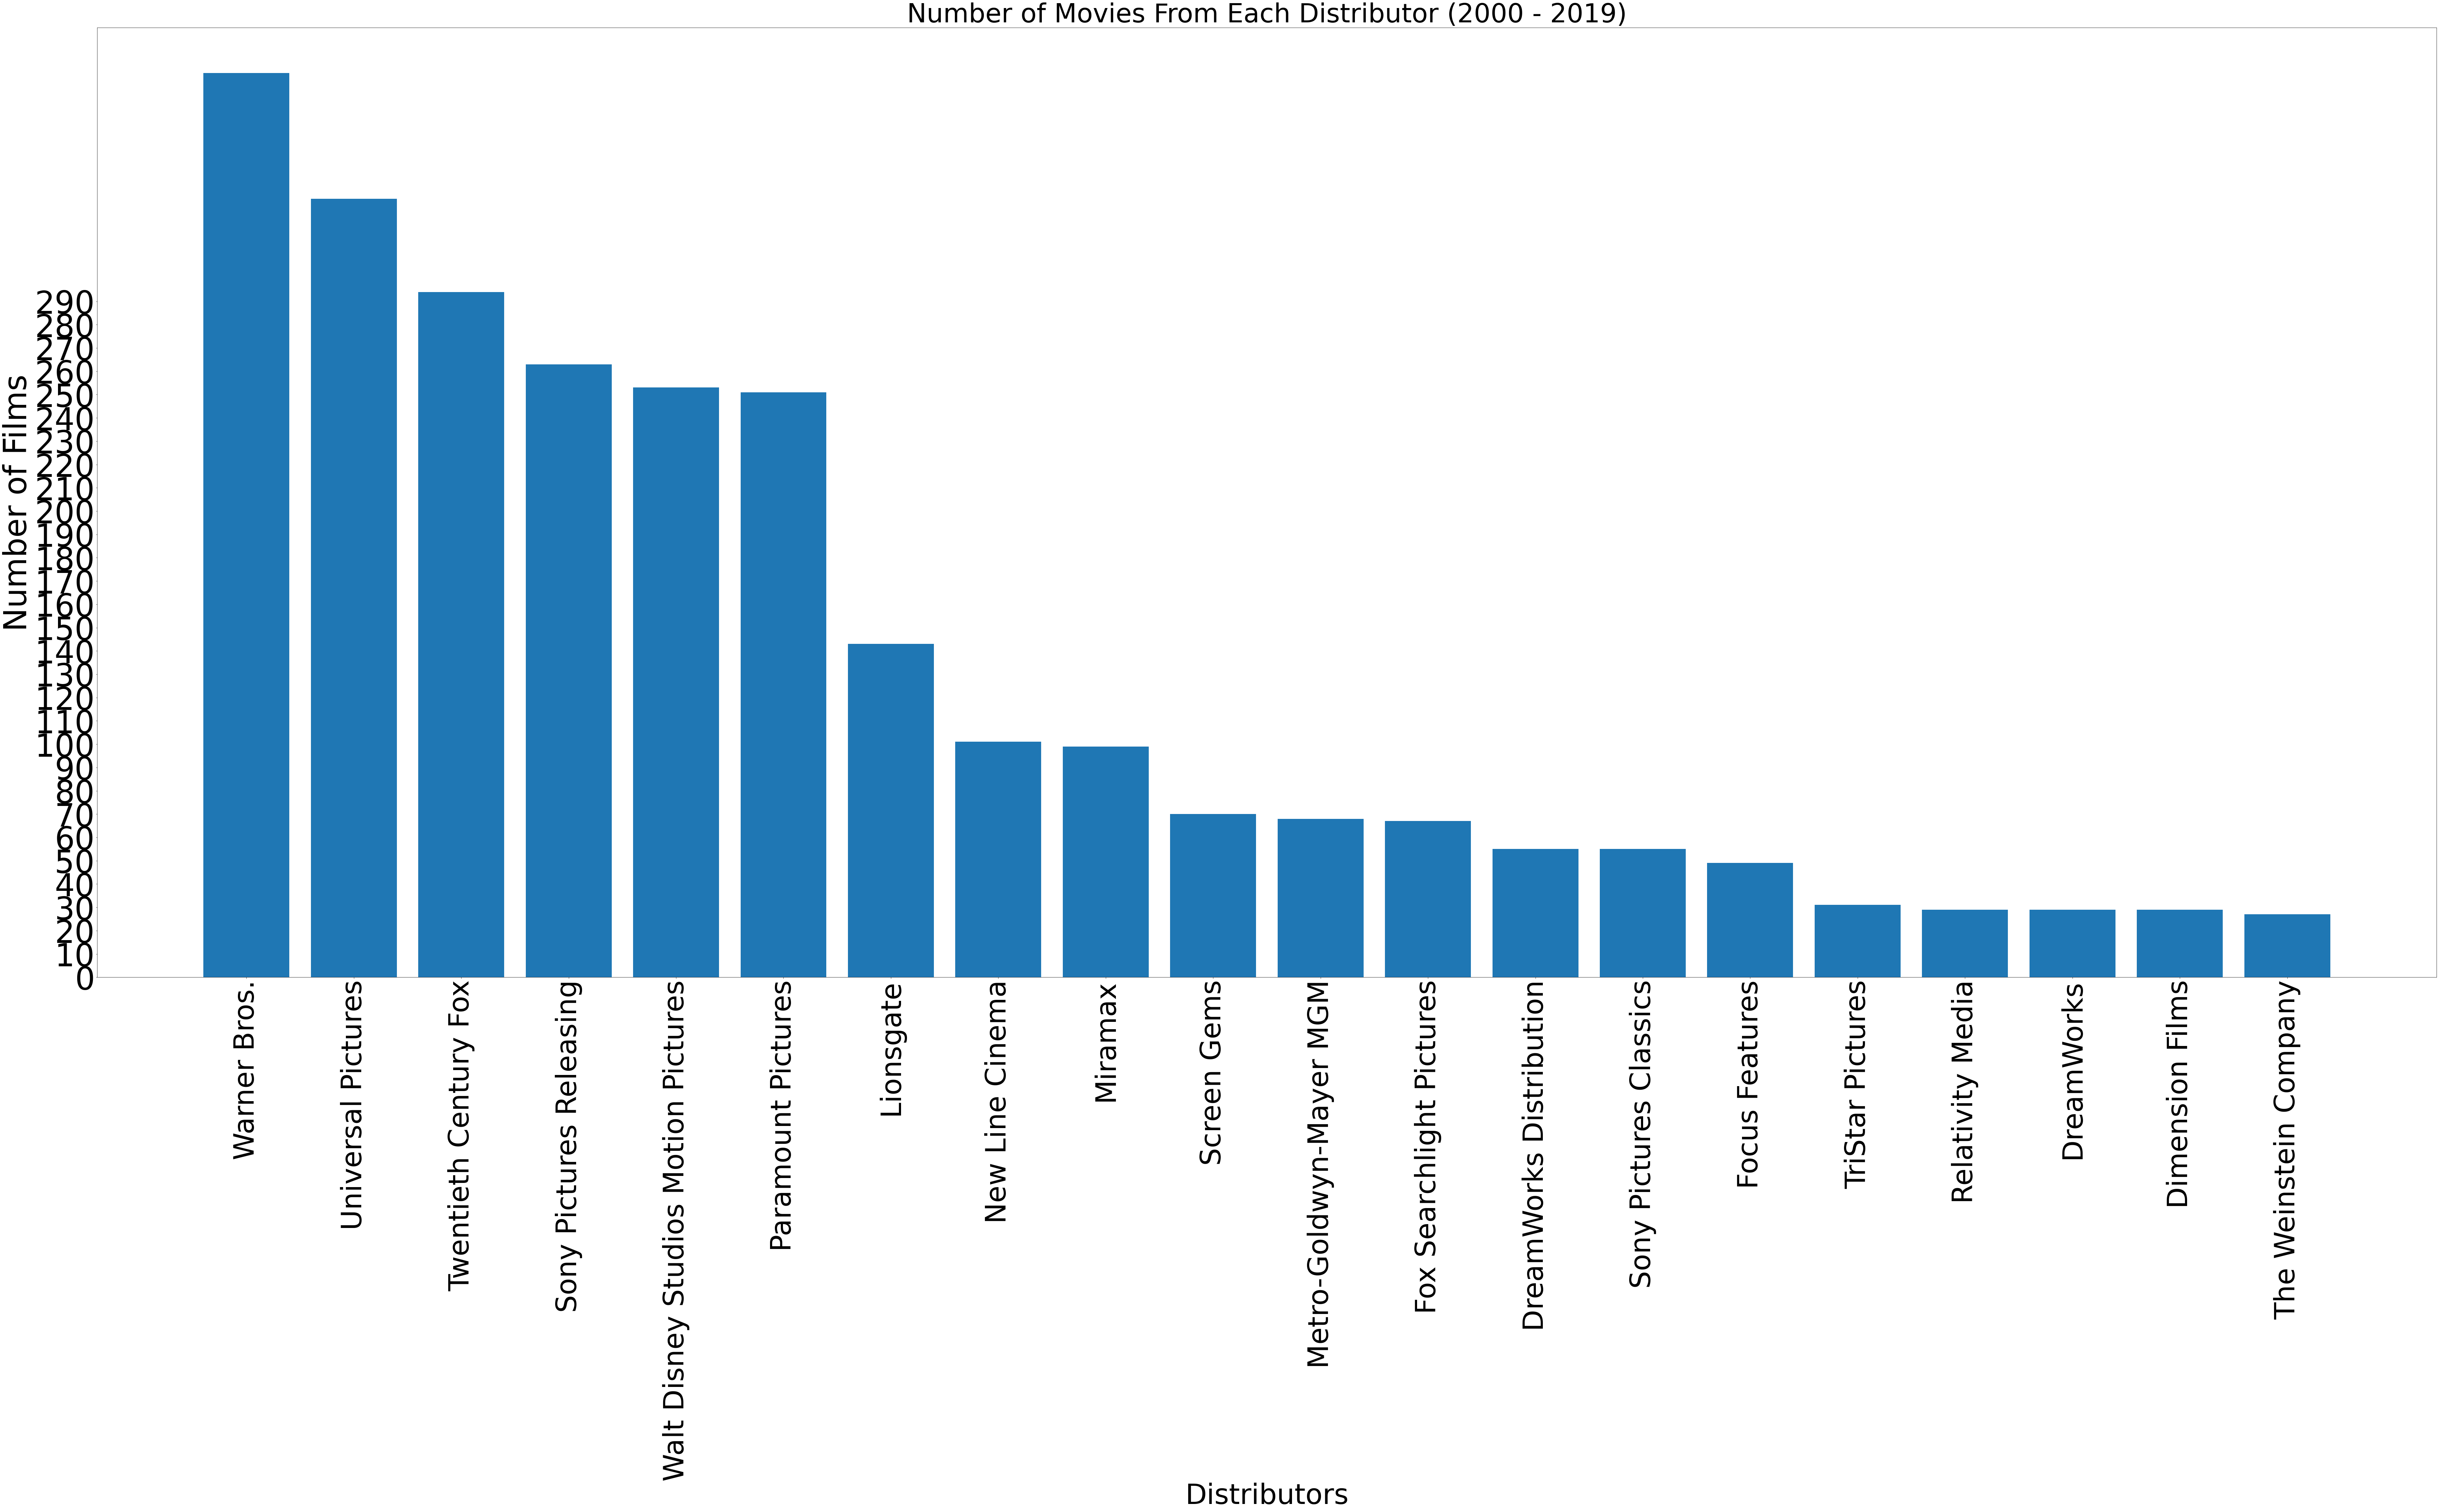

In [53]:
distributors = distributor_count['distributor']
film_count = distributor_count['title']
plt.figure(figsize = (120, 50))
plt.bar(distributors[:20], film_count[:20])
plt.xticks(distributors[:20], rotation='vertical', size = '80')
plt.yticks(np.arange(0,300, step = 10), size = '80')
plt.xlabel('Distributors', size = '80')
plt.ylabel('Number of Films', size = '80')
plt.title('Number of Movies From Each Distributor (2000 - 2019)', size = '75')

plt.show()

### Q2: Who are the top 6 distributors?

In [26]:
distributor_count = distributor_count.rename(columns = {'Title': 'Movie Count'})
distributor_count[['Distributor', 'Movie Count']].head(6)


,Distributor,Movie Count
70,Warner Bros.,292
67,Universal Pictures,275
63,Twentieth Century Fox,230
56,Sony Pictures Entertainment (SPE),206
42,Paramount Pictures,179
69,Walt Disney Studios Motion Pictures,176


### Q3: What are the most profitable movies for the top 6? What are the least profitable?

In [27]:
top_six = distributor_count[['Distributor', 'Movie Count']].head(6)['Distributor']
top_six

70                           Warner Bros.
67                     Universal Pictures
63                  Twentieth Century Fox
56      Sony Pictures Entertainment (SPE)
42                     Paramount Pictures
69    Walt Disney Studios Motion Pictures
Name: Distributor, dtype: object

In [31]:
movie_data[movie_data['Distributor'].isin(top_six)].groupby('Distributor').max()

/var/folders/g9/wwq0wrt14jxdcz1yz2ccln800000gn/T/ipykernel_10175/2974494342.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  movie_data[movie_data['Distributor'].isin(top_six)].groupby('Distributor').max()


,Title,Domestic,Budget,Runtime,movie_year,director,main_actor_1,main_actor_2,main_actor_3,main_actor_4,worldwide,genre_1
Distributor,,,,,,,,,,,,
Paramount Pictures,Æon Flux,318604126,217000000.0,180,2020,William Friedkin,Will Smith,Zachary Quinto,Zoe Saldana,Zooey Deschanel,1104054072,Mystery
Sony Pictures Entertainment (SPE),Zookeeper,404515480,258000000.0,165,2020,Will Gluck,Ziyi Zhang,Óscar Jaenada,Zoë Kravitz,Zoe Fish,1131927996,Mystery
Twentieth Century Fox,X2: X-Men United,749766139,237000000.0,165,2019,Wes Ball,Zoey Deutch,Zooey Deschanel,Zooey Deschanel,Zendaya,2790439000,Horror
Universal Pictures,Your Highness,652270625,250000000.0,187,2020,Zack Snyder,Zac Efron,Winston Duke,Zach Gilford,Zena Grey,1670400637,Romance
Walt Disney Studios Motion Pictures,You Again,936662225,356000000.0,183,2019,Will Finn,Zach Braff,Zoe Saldana,Zuleikha Robinson,Zooey Deschanel,2797800564,Family
Warner Bros.,Yogi Bear,533345358,270000000.0,219,2019,Zack Snyder,Zachary Levi,Zooey Deschanel,Zazie Beetz,Zoë Kravitz,1081041287,Sci-Fi


In [32]:
movie_data[movie_data['Distributor'].isin(top_six)].groupby('Distributor')[['Profit','Title']].min()

KeyError: "Columns not found: 'Profit'"

In [38]:
movie_data['Domestic'] = pd.to_numeric(movie_data['Domestic'])
movie_data['Budget'] = pd.to_numeric(movie_data['Budget'])
movie_data['Profit'] = movie_data['Domestic'] - movie_data['Budget']

In [39]:
movie_data[movie_data['Distributor'] == 'Paramount Pictures'].sort_values(['Profit'],ascending=False)

,Title,Domestic,Budget,Distributor,MPAA-Rating,Runtime,movie_year,director,writer,producer,...,main_actor_1,main_actor_2,main_actor_3,main_actor_4,worldwide,genre_1,genre_2,genre_3,genre_4,Profit
95,Iron Man,318604126,140000000.0,Paramount Pictures,PG-13,126,2008,Jon Favreau,Mark Fergus,Avi Arad,...,Robert Downey Jr.,Gwyneth Paltrow,Terrence Howard,Jeff Bridges,585366247,Action,Adventure,Sci-Fi,NaN,178604126.0
2034,A Quiet Place,188024361,17000000.0,Paramount Pictures,PG-13,90,2018,John Krasinski,Bryan Woods,Michael Bay,...,Emily Blunt,John Krasinski,Millicent Simmonds,Noah Jupe,340939361,Drama,Horror,Sci-Fi,NaN,171024361.0
1228,True Grit,171243005,38000000.0,Paramount Pictures,PG-13,110,2010,Ethan Coen,Joel Coen,Ethan Coen,...,Jeff Bridges,Matt Damon,Hailee Steinfeld,Josh Brolin,252276927,Drama,Western,NaN,NaN,133243005.0
96,Indiana Jones and the Kingdom of the Crystal S...,317101119,185000000.0,Paramount Pictures,PG-13,122,2008,Steven Spielberg,David Koepp,Frank Marshall,...,Harrison Ford,Cate Blanchett,Shia LaBeouf,Karen Allen,790653942,Action,Adventure,NaN,NaN,132101119.0
207,What Women Want,182811707,70000000.0,Paramount Pictures,PG-13,127,2000,Nancy Meyers,Josh Goldsmith,Susan Cartsonis,...,Mel Gibson,Helen Hunt,Marisa Tomei,Alan Alda,374111707,Comedy,Fantasy,Romance,NaN,112811707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,Ghost in the Shell,40563557,110000000.0,Paramount Pictures,PG-13,107,2017,Rupert Sanders,Shirow Masamune,Ari Arad,...,Scarlett Johansson,Pilou Asbæk,Takeshi Kitano,Juliette Binoche,169801921,Action,Drama,Sci-Fi,Thriller,-69436443.0
1912,Ben-Hur,26410477,100000000.0,Paramount Pictures,PG-13,123,2016,Timur Bekmambetov,Lew Wallace,Sean Daniel,...,Jack Huston,Toby Kebbell,Rodrigo Santoro,Nazanin Boniadi,94061311,Action,Adventure,Drama,History,-73589523.0
1947,Transformers: The Last Knight,130168683,217000000.0,Paramount Pictures,PG-13,154,2017,Michael Bay,Art Marcum,Ian Bryce,...,Mark Wahlberg,Anthony Hopkins,Josh Duhamel,Laura Haddock,605425157,Action,Adventure,Sci-Fi,NaN,-86831317.0
2146,Gemini Man,48546770,138000000.0,Paramount Pictures,PG-13,117,2019,Ang Lee,David Benioff,Jerry Bruckheimer,...,Will Smith,Mary Elizabeth Winstead,Clive Owen,Benedict Wong,173469516,Action,Drama,Sci-Fi,Thriller,-89453230.0


In [42]:
movie_data[movie_data['movie_year'] == 2020].sort_values(by=['Profit'], ascending=False)

,Title,Domestic,Budget,Distributor,MPAA-Rating,Runtime,movie_year,director,writer,producer,...,main_actor_1,main_actor_2,main_actor_3,main_actor_4,worldwide,genre_1,genre_2,genre_3,genre_4,Profit
193,Bad Boys for Life,206305244,90000000.0,Sony Pictures Entertainment (SPE),R,124,2020,Adil El Arbi,Chris Bremner,Doug Belgrad,...,Will Smith,Martin Lawrence,Vanessa Hudgens,Alexander Ludwig,425514702,Action,Comedy,Crime,Thriller,116305244.0
579,The Grudge,110359362,10000000.0,Sony Pictures Entertainment (SPE),PG-13,91,2020,Nicolas Pesce,Nicolas Pesce,Takashige Ichise,...,Tara Westwood,Junko Bailey,David Lawrence Brown,Zoe Fish,49511319,Horror,Mystery,NaN,NaN,100359362.0
194,Sonic the Hedgehog,148974665,85000000.0,Paramount Pictures,PG,99,2020,Jeff Fowler,Patrick Casey,Toby Ascher,...,Ben Schwartz,James Marsden,Jim Carrey,Tika Sumpter,306766470,Action,Adventure,Comedy,Family,63974665.0
198,The Invisible Man,70410000,7000000.0,Universal Pictures,R,124,2020,Leigh Whannell,Leigh Whannell,Jason Blum,...,Elisabeth Moss,Oliver Jackson-Cohen,Harriet Dyer,Aldis Hodge,124561225,Horror,Mystery,Sci-Fi,Thriller,63410000.0
2180,Fantasy Island,27309289,7000000.0,Sony Pictures Entertainment (SPE),PG-13,109,2020,Jeff Wadlow,Jillian Jacobs,Jason Blum,...,Michael Peña,Maggie Q,Lucy Hale,Austin Stowell,48607556,Adventure,Fantasy,Horror,Mystery,20309289.0
581,The Grudge,21221803,10000000.0,Sony Pictures Entertainment (SPE),R,94,2020,Nicolas Pesce,Nicolas Pesce,Takashige Ichise,...,Tara Westwood,Junko Bailey,David Lawrence Brown,Zoe Fish,49511319,Horror,Mystery,NaN,NaN,11221803.0
2182,The Photograph,20578185,16000000.0,Universal Pictures,PG-13,106,2020,Stella Meghie,Stella Meghie,James Lopez,...,LaKeith Stanfield,Chelsea Peretti,Issa Rae,Courtney B. Vance,20648307,Drama,Romance,NaN,NaN,4578185.0
2184,Brahms: The Boy II,12611536,10000000.0,STX Entertainment,PG-13,86,2020,William Brent Bell,Stacey Menear,Matt Berenson,...,Katie Holmes,Owain Yeoman,Christopher Convery,Ralph Ineson,20311536,Drama,Horror,Mystery,Thriller,2611536.0
2183,The Turning,15472775,14000000.0,Universal Pictures,PG-13,94,2020,Floria Sigismondi,Carey W. Hayes,Scott Bernstein,...,Mackenzie Davis,Finn Wolfhard,Brooklynn Prince,Barbara Marten,18474062,Drama,Horror,Mystery,NaN,1472775.0
2181,Like a Boss,22169514,29000000.0,Paramount Pictures,R,83,2020,Miguel Arteta,Sam Pitman,Marc Evans,...,Rose Byrne,Salma Hayek,Tiffany Haddish,Jessica St. Clair,29753143,Comedy,NaN,NaN,NaN,-6830486.0
